<a href="https://colab.research.google.com/github/cjayjonathan/Counting-Coins/blob/main/Outlier_Detection_on_a_Real_Data_Set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine


In [5]:
# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

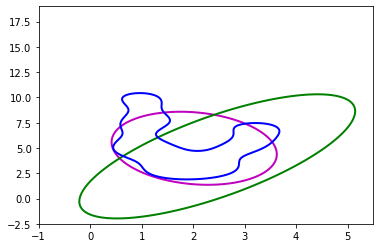

In [6]:
# Get data
X2 = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

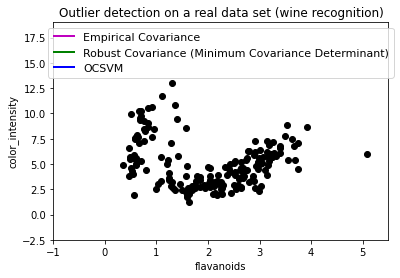

In [7]:
# Plot the results (= shape of the data points cloud)
plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color="black")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend(
    (
        legend2_values_list[0].collections[0],
        legend2_values_list[1].collections[0],
        legend2_values_list[2].collections[0],
    ),
    (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()